SPECTRAL CLASSIFICATION OF CHANDRAYAAN -2 IIRS DATASET

In [1]:
! pip install spectral

In [2]:
data_file= "ch2_iir_nci_20240606T0133308304_d_img_d18.qub"
header_file= "ch2_iir_nci_20240606T0133308304_d_img_d18.hdr"
geometry_file= "ch2_iir_nci_20240606T0133308304_g_grd_d18.csv"

In [3]:
import spectral 
import os 

In [4]:
data= spectral.io.envi.open(header_file, image=data_file)

In [5]:
hyperspectral_data= data.load()

In [6]:
hyperspectral_data

ImageArray([[[1.8126157e+03 1.8413784e+03 1.8701409e+03 ...
              1.1227812e+03 1.0808821e+03 1.1281182e+03]
             [1.8126157e+03 1.8413784e+03 1.8701409e+03 ...
              1.1227812e+03 1.0808821e+03 1.1281182e+03]
             [1.8126157e+03 1.8413784e+03 1.8701409e+03 ...
              1.1227812e+03 1.0808821e+03 1.1281182e+03]
             ...
             [0.0000000e+00 0.0000000e+00 1.6650787e+02 ...
              1.3621198e+03 1.2905969e+03 1.3354355e+03]
             [0.0000000e+00 0.0000000e+00 1.6650787e+02 ...
              1.3621198e+03 1.2905969e+03 1.3354355e+03]
             [0.0000000e+00 0.0000000e+00 1.6650787e+02 ...
              1.3621198e+03 1.2905969e+03 1.3354355e+03]]

            [[1.8104430e+03 1.8190231e+03 1.8276031e+03 ...
              1.1184512e+03 1.0300807e+03 1.0487043e+03]
             [1.8104430e+03 1.8190231e+03 1.8276031e+03 ...
              1.1184512e+03 1.0300807e+03 1.0487043e+03]
             [1.8104430e+03 1.8190231e+03 1.8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


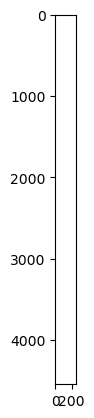

In [7]:
import matplotlib.pyplot as plt
rgb_image= hyperspectral_data[:, :, [200, 50, 56]]
plt.imshow(rgb_image)
plt.show()

In [8]:
print(f"Shape of the data: {hyperspectral_data.shape}")

Shape of the data: (4542, 250, 256)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten , MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
IMAGES_PATH = Path() / "images" / "hyperspectral"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [11]:
def plot_reflectance_variation(x , y):
  if x >= 0 and x < hyperspectral_data.shape[1] and y >= 0 and y < hyperspectral_data.shape[0]:
    reflectance_values = hyperspectral_data[y, x, :]
    plt.figure(figsize = (10 , 6))
    plt.plot(range(hyperspectral_data.shape[2]), reflectance_values.squeeze())
    plt.xlabel('Wavelength')
    plt.ylabel('Reflectance')
    plt.title(f'Reflectance Variation at ({x}, {y})')
    save_fig("reflectance variation vs wavelength")
    plt.show()
  else:
    print("Invalid coordinates")

Enter the x coordinate:  3
Enter the y coordinate:  3


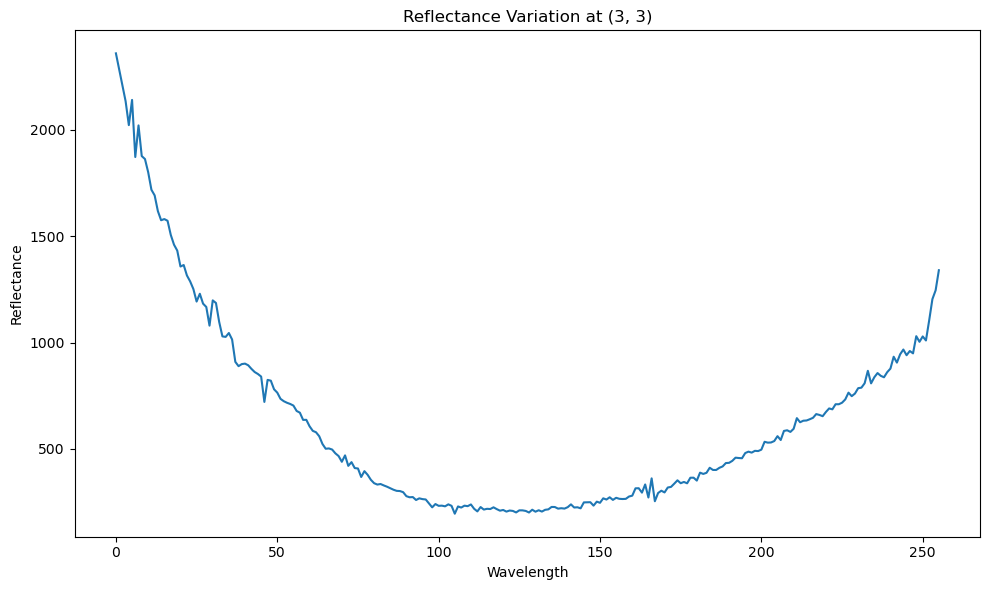

In [12]:
x = int(input("Enter the x coordinate: "))
y = int(input("Enter the y coordinate: "))
plot_reflectance_variation(x , y)

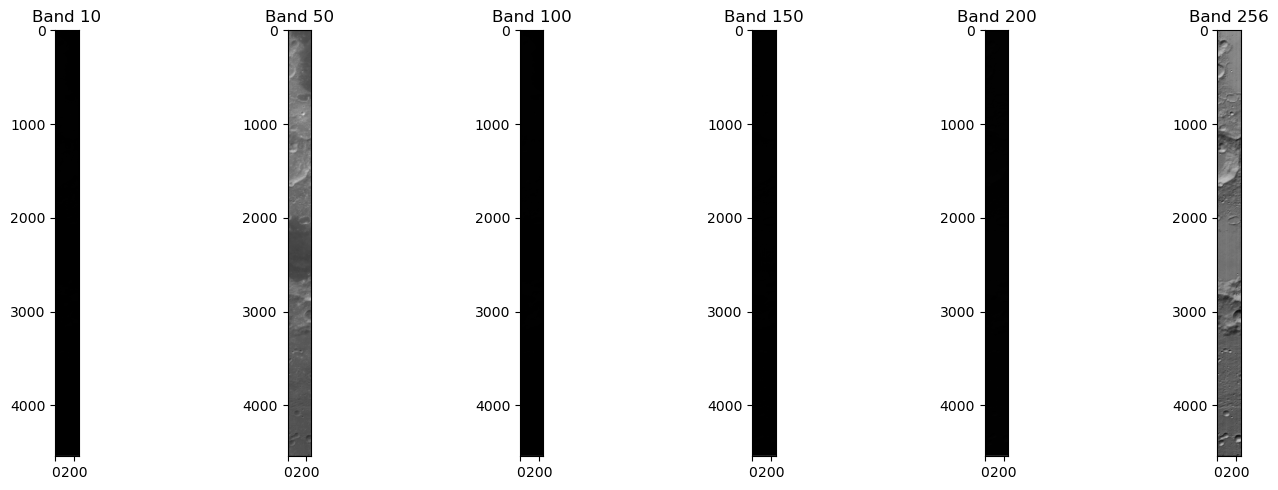

In [13]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

axes[0].imshow(hyperspectral_data[:,:,10], cmap='gray')
axes[0].set_title('Band 10')

axes[1].imshow(hyperspectral_data[:,:,50], cmap='gray')
axes[1].set_title('Band 50')

axes[2].imshow(hyperspectral_data[:,:,100], cmap='gray')
axes[2].set_title('Band 100')

axes[3].imshow(hyperspectral_data[:,:,150], cmap='gray')
axes[3].set_title('Band 150')

axes[4].imshow(hyperspectral_data[:,:,200], cmap='gray')
axes[4].set_title('Band 200')

axes[5].imshow(hyperspectral_data[:,:,255], cmap='gray')
axes[5].set_title('Band 256')

save_fig("grayscale image of strip at 6 different bands")

plt.show()

In [14]:
coord_df = pd.read_csv(geometry_file)

In [15]:
coord_df.head()

,Longitude,Latitude,Pixel,Scan
0,205.842088,-35.730159,0,0
1,205.990651,-35.734308,50,0
2,206.140035,-35.738317,100,0
3,206.290285,-35.742183,150,0
4,206.441449,-35.745905,200,0


Enter the band:  200


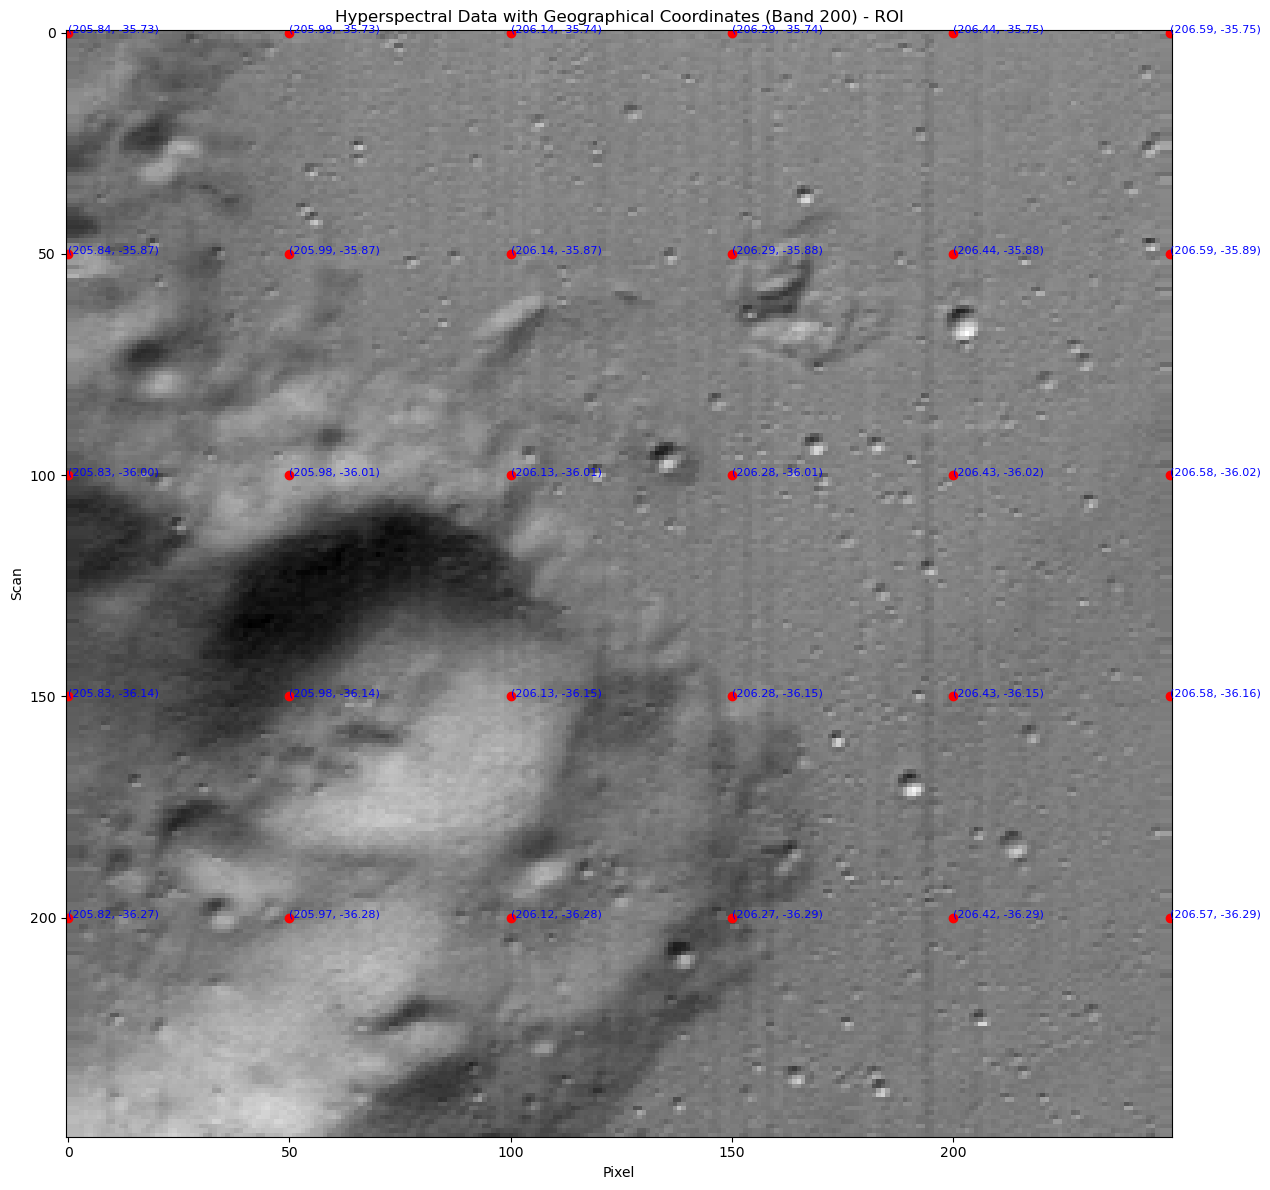

In [16]:
# roi = region of interest
roi_start_x = 0
roi_end_x = 250
roi_start_y = 0
roi_end_y = 250

def plot_roi_hyperspectral_with_coords(band_index):
    plt.figure(figsize=(20, 12))

    plt.imshow(hyperspectral_data[roi_start_y:roi_end_y, roi_start_x:roi_end_x, band_index], cmap='gray')

    for index, row in coord_df.iterrows():
        pixel = row['Pixel']
        scan = row['Scan']


        if roi_start_x <= pixel < roi_end_x and roi_start_y <= scan < roi_end_y:
            lon = row['Longitude']
            lat = row['Latitude']


            plt.plot(pixel - roi_start_x, scan - roi_start_y, 'ro')
            plt.text(pixel - roi_start_x, scan - roi_start_y, f"({lon:.2f}, {lat:.2f})", color='blue', fontsize=8)

    plt.title(f'Hyperspectral Data with Geographical Coordinates (Band {band_index}) - ROI')
    plt.xlabel('Pixel')
    plt.ylabel('Scan')
    save_fig(f"Image geographical coordinates")
    plt.show()

plot_roi_hyperspectral_with_coords(int(input(f"Enter the band: ")))

In [17]:
normalized_data = hyperspectral_data / np.max(hyperspectral_data)

In [18]:
flattened_data = normalized_data.reshape(-1, normalized_data.shape[-1])

In [19]:
flattened_data.shape

(1135500, 256)

In [20]:
print(flattened_data[:10])

[[1.45158789e-04 1.47462168e-04 1.49765547e-04 ... 8.99151200e-05
  8.65597322e-05 9.03425098e-05]
 [1.45158789e-04 1.47462168e-04 1.49765547e-04 ... 8.99151200e-05
  8.65597322e-05 9.03425098e-05]
 [1.45158789e-04 1.47462168e-04 1.49765547e-04 ... 8.99151200e-05
  8.65597322e-05 9.03425098e-05]
 ...
 [2.16685512e-04 2.09448568e-04 2.02211639e-04 ... 1.01478356e-04
  1.01445032e-04 1.07717002e-04]
 [2.59466789e-04 2.47732940e-04 2.35999076e-04 ... 1.09083798e-04
  9.24654159e-05 9.14874909e-05]
 [2.20317641e-04 2.13530613e-04 2.06743571e-04 ... 9.35055796e-05
  8.55428734e-05 8.89634975e-05]]


In [21]:
pca = PCA(n_components = 10)
reduces_data = pca.fit_transform(flattened_data)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance Ratio by 10 components: {explained_variance}")

Explained Variance Ratio by 10 components: 0.9995335437357236


In [22]:
reduces_data.shape

(1135500, 10)

In [23]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# 1. Generate sample data if you don't have your own
X, y = make_regression(n_samples=100, n_features=50, n_informative=10, noise=0.1, random_state=42)

# 2. Standardize the data (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)  # Adjust alpha for more/less sparsity
lasso.fit(X_scaled, y)  # Using y as our labels/target variable

# 4. Get selected features
selected_features_indices = np.where(lasso.coef_ != 0)[0]
print(f"Selected {len(selected_features_indices)} features out of {X.shape[1]}:")
print(selected_features_indices)

# 5. Get feature importance scores
feature_importance = np.abs(lasso.coef_)
print("\nFeature importance scores:")
print(feature_importance)

Selected 20 features out of 50:
[ 0  2  4  7 11 12 13 22 27 28 30 37 41 42 43 45 46 47 48 49]

Feature importance scores:
[5.41211719e-03 0.00000000e+00 5.05161041e-03 0.00000000e+00
 8.42104306e+01 0.00000000e+00 0.00000000e+00 7.87120684e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.25019903e-04
 3.76797312e+01 6.40194691e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98110074e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.42064756e+01
 2.62373861e+01 0.00000000e+00 1.46360214e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.52751860e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.51180811e-04 5.32624882e-03 9.17991213e-04
 0.00000000e+00 1.32841560e-02 6.76878944e+00 2.61740578e-03
 6.94558053e+01 1.63141126e+01]


In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# 1. Generate sample data if you don't have your own
X, y = make_classification(n_samples=100, n_features=50, n_informative=10, random_state=42)

# 2. Standardize the data (good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Select top 10 features using ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)  # y contains our labels

print(f"Selected {X_selected.shape[1]} features out of {X.shape[1]}:")
print("Selected feature indices:", selector.get_support(indices=True))
print("Feature scores:", selector.scores_)

Selected 10 features out of 50:
Selected feature indices: [ 9 13 19 25 29 30 31 37 39 40]
Feature scores: [1.06054478e+00 1.15592664e-02 1.99789956e-01 2.38536084e-02
 1.05578292e+00 8.18855595e-02 3.41116095e-01 1.92570789e-01
 4.91378376e-01 1.07246341e+01 4.44439294e-02 5.03846569e-01
 8.40202488e-01 3.81067446e+01 1.76957322e+00 1.09731088e-01
 9.41286734e-02 1.81709600e+00 2.16084971e+00 3.39991082e+00
 3.67454121e-01 2.03286751e-04 1.62855564e-02 8.61394307e-03
 3.29642094e-01 3.26311447e+00 1.33577720e+00 2.97038801e-01
 1.19515942e-01 2.31672802e+00 6.50492058e+00 3.95763531e+00
 8.19860591e-02 5.70841444e-01 2.01402614e-01 9.17313066e-01
 1.20784945e-01 3.02224919e+00 1.89215078e-02 1.05706736e+01
 1.53563112e+01 7.81484234e-02 1.55039264e+00 2.28173020e+00
 1.89022995e+00 1.88237211e-01 3.37624915e-01 1.80785918e+00
 3.88123973e-01 1.32064946e-02]


In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# 1. Generate sample data if you don't have your own
X, y = make_classification(
    n_samples=1000,
    n_features=50,
    n_informative=10,
    n_redundant=10,
    random_state=42
)

# 2. Standardize the data (recommended for most ML algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Initialize Random Forest and RFE
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1)

# 4. Perform feature selection
X_selected = selector.fit_transform(X_scaled, y)  # y contains our labels

# 5. Analyze results
print(f"Selected {X_selected.shape[1]} features out of {X.shape[1]}:")
print("Selected feature indices:", selector.get_support(indices=True))
print("Feature rankings (1 = selected):", selector.ranking_)

Selected 10 features out of 50:
Selected feature indices: [ 2  5 10 12 13 17 33 39 40 45]
Feature rankings (1 = selected): [14 30  1  6 23  1 28  2 11 31  1 32  1  1 22 35 12  1  4  9 24  7 34 13
 20  5 27 16 18 33 38 19 37  1 25 39 17 10 29  1  1 36  8 21 15  1 41 40
  3 26]


In [31]:
kmean = KMeans(n_clusters=5)

In [32]:
labels = kmean.fit_predict(reduces_data)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
def nearest_centroid(X , centroid):
  k = centroid.shape[0]
  c = np.zeros(X.shape[0] , dtype=int)

  for i in range(X.shape[0]):
    distance = []
    for j in range(k):
      norm_ij = np.linalg.norm(X[i] - centroid[j])
      distance.append(norm_ij)
    c[i] = np.argmin(distance)
  return c

def compute_centroid(X , c , k):
  m , n = X.shape
  centroids = np.zeros((k , n))
  for i in range(k):
    centroids[i] = np.mean(X[c == i] , axis = 0)
  return centroids

def initialize_centroid(X , k):
  random_index = np.random.permutation(X.shape[0])
  return X[random_index[:k]]

In [34]:
def run_kMeans(X, initial_centroids, iter, plot_progress=False):
    m, n = X.shape
    k = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))


    for i in range(iter):
        print("K-Means iteration %d/%d" % (i, iter-1))
        idx = nearest_centroid(X, centroids)
        if plot_progress:
            # plot_progress_kMeans(X, centroids, previous_centroids, idx, k, i)
            previous_centroids = centroids
        centroids = compute_centroid(X, idx, k)
    plt.show()
    return centroids, idx

In [35]:
k = 5
iter = 4
initial_centroids = initialize_centroid(reduces_data , k)
centroids , c = run_kMeans(reduces_data , initial_centroids , iter )

K-Means iteration 0/3
K-Means iteration 1/3
K-Means iteration 2/3
K-Means iteration 3/3


<Figure size 800x600 with 0 Axes>

In [36]:
centroids , c.shape , centroids.shape

(array([[-8.65693146e-05,  5.15331021e-06,  2.56564772e-06,
         -4.03623490e-05,  3.36563317e-05, -2.69682587e-05,
         -1.17991949e-05,  3.96802716e-05, -2.41720045e-05,
          3.82806957e-06],
        [-1.01387232e-04, -2.64009032e-05,  8.36435502e-05,
          3.07142109e-05, -8.41188103e-06, -4.70060877e-05,
          2.26501797e-05, -4.57724855e-05,  2.83720510e-05,
         -5.44769409e-06],
        [ 4.51506138e-01,  8.29597993e-04, -1.05689075e-02,
          4.05880809e-03, -6.60281116e-03, -4.59042349e-04,
          1.13830050e-04,  1.39953427e-05, -5.81336353e-05,
         -1.50620006e-04],
        [-2.71965400e-04, -5.39720759e-06,  4.00573626e-05,
         -1.63008845e-05,  2.31887607e-05, -1.01887454e-04,
          1.66142377e-06,  1.44278310e-05, -6.79602363e-06,
          7.05627008e-06],
        [ 6.58628123e-05,  2.76253813e-05, -1.19580560e-04,
          1.49946645e-05, -3.71212336e-05,  1.73407228e-04,
         -1.52461807e-05, -4.61634698e-07, -2.173978

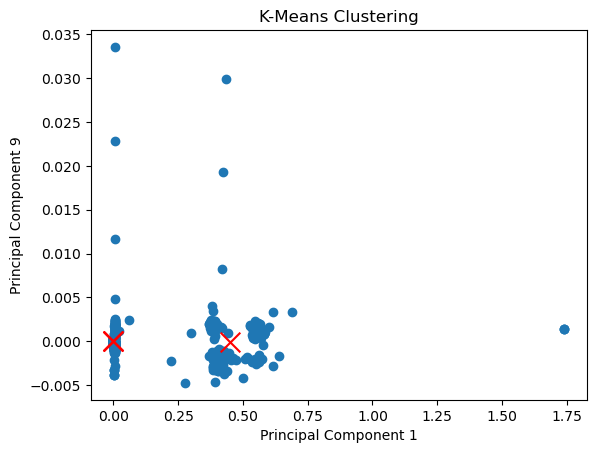

In [37]:
plt.scatter(reduces_data[:, 0], reduces_data[:, 8])
plt.scatter(centroids[:, 0], centroids[:, 8], marker='x', color='red', s=200)
plt.title("K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 9")
plt.show()

In [38]:
clustered_image = labels.reshape(hyperspectral_data.shape[0] , hyperspectral_data.shape[1])

In [39]:
labels.shape

(1135500,)

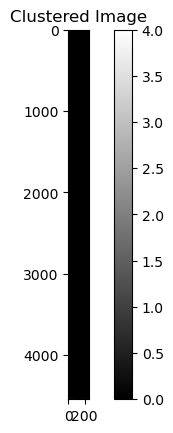

In [40]:
plt.imshow(clustered_image, cmap='gray')
plt.title("Clustered Image")
plt.colorbar()
plt.show()

In [41]:
X = reduces_data
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(908400, 10)

In [43]:
X_train_cnn = X_train.reshape(-1, 10, 1, 1)
X_test_cnn = X_test.reshape(-1, 10, 1, 1) 

In [44]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(10 ,1,1) ,  padding='same'),
    MaxPooling2D((2, 1)),
    Conv2D(64, (3, 3), activation='relu',  padding='same'),
    MaxPooling2D((2, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 10, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 5, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,325 (251.27 KB)

 Trainable params: 64,325 (251.27 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 203s 9ms/step - accuracy: 0.9994 - loss: 0.0136 - val_accuracy: 0.9999 - val_loss: 1.4207e-04
Epoch 2/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 192s 8ms/step - accuracy: 0.9999 - loss: 1.8618e-04 - val_accuracy: 0.9999 - val_loss: 1.1871e-04
Epoch 3/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 185s 8ms/step - accuracy: 0.9999 - loss: 1.4200e-04 - val_accuracy: 1.0000 - val_loss: 3.9119e-05
Epoch 4/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 180s 8ms/step - accuracy: 1.0000 - loss: 1.3480e-04 - val_accuracy: 1.0000 - val_loss: 1.1853e-04
Epoch 5/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 199s 9ms/step - accuracy: 1.0000 - loss: 9.2315e-05 - val_accuracy: 1.0000 - val_loss: 2.0849e-04
Epoch 6/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 131s 6ms/step - accuracy: 1.0000 - loss: 1.1355e-04 - val_accuracy: 1.0000 - val_loss: 5.7035e-05
Epoch 7/10
22710/22710 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 1.0000 - loss: 3.6468e-05 - val_accuracy: 1.0000 - val_loss: 1.6383e-04
Epoch 8/10


In [49]:
cnn_eval = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {cnn_eval[1]}')

7097/7097 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 1.0000 - loss: 4.7847e-04
CNN Accuracy: 0.9999911785125732
